# Moment Estimation of transcriptional parameters

From Bagnall et al. 2020



$$
\begin{align}
   b_m &= \frac{\sigma^2}{\mu} \\\
   \\\
   f_m &= \frac{\mu}{b_m-1} \\\
   \\\
   f_m &= \frac{\mu^2}{\sigma^2-\mu} \\\
   \\\
\end{align}    
$$

- Moments scRNAseq


In [1]:
ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end

using Seaborn, PyPlot, PyCall, DataFrames
using NoLongerProblems_Pandas, Pandas
using MultipleTesting, HypothesisTests 
using SingleCellExperiment
using CSV, ProgressMeter,PrettyPlotting, ScikitLearn
@sk_import linear_model: LogisticRegression

include("../Databases/Cuartero2018.jl")
include("../Databases/Bhatt2012.jl")
include("../Databases/MF_SingleCell.jl")
include("../Code/Load_scRNAseqData.jl")

function calculate_moments(sceexp)
    genedata = sceexp.rowData
    cols = names(genedata)
    samples = cols[[occursin("__mu", ii) for ii in cols]]
    samples = [split(ii, "__")[1] for ii in samples]
    for s in samples
        genedata[!,s*"__bm"] = (genedata[!,s*"__std"].^2) ./ genedata[!,s*"__mu"]
        genedata[!,s*"__fm"] = genedata[!,s*"__mu"].^2 ./ ((genedata[!,s*"__std"].^2) .- genedata[!,s*"__mu"])
    end
    sceexp.rowData = genedata
    sceexp
end

sce = SingleCellExperiment.fit_mu_std_alpha(sce, splitdataby = :Sample, assay = "CPM")
bhattgenes = Bhatt2012.inducible_genes_figure3()[!,:GeneSymbol];
sce = calculate_moments(sce)

include("momentcalculation.jl")
include("testfunctions.jl")


┌ Info: Installing pyqt package to avoid buggy tkagg backend.
└ @ PyPlot /Users/irene/.julia/packages/PyPlot/XaELc/src/init.jl:118
┌ Info: Precompiling SingleCellExperiment [4f094565-8285-4053-8640-d916605c3f41]
└ @ Base loading.jl:1317
[ Info: Installing pyqt package to avoid buggy tkagg backend.


do_mantelhaen (generic function with 1 method)

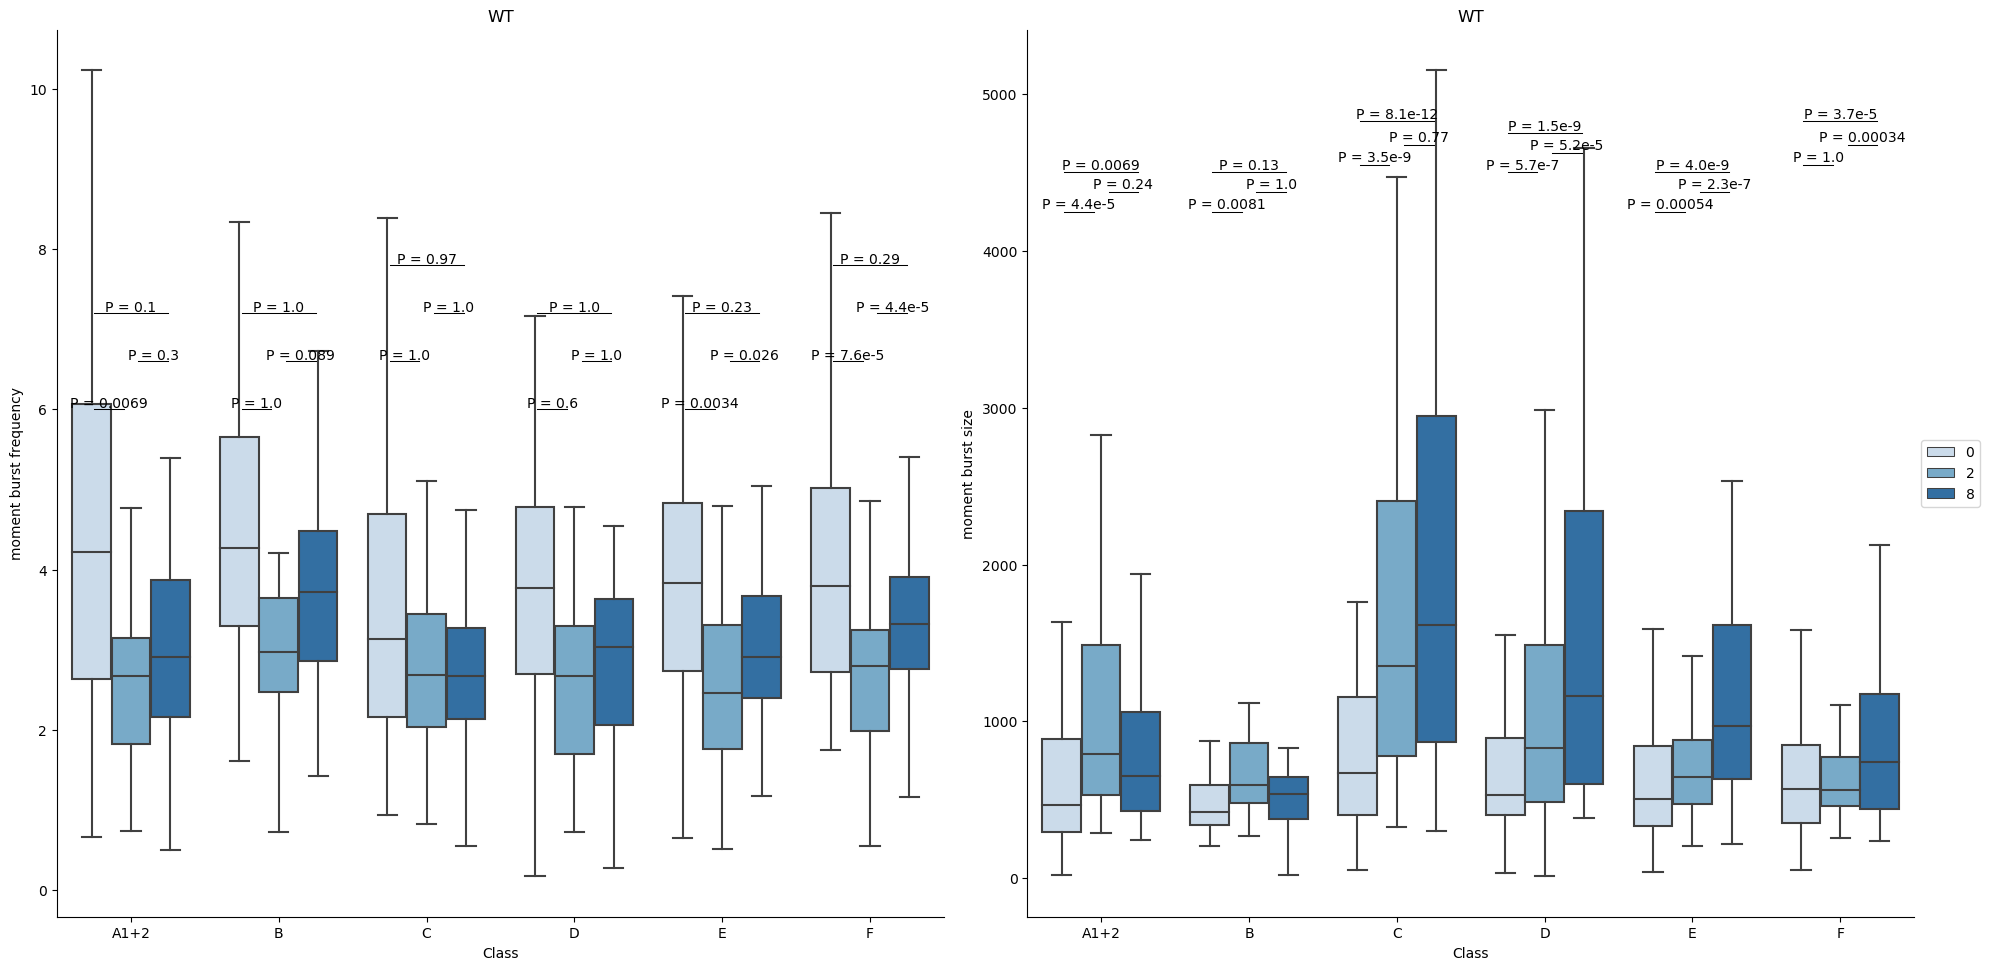

Percent 10.0%
Total genes considered 453


In [2]:
alpha = 0.1
include("scRNAseqmomentsWT.jl")

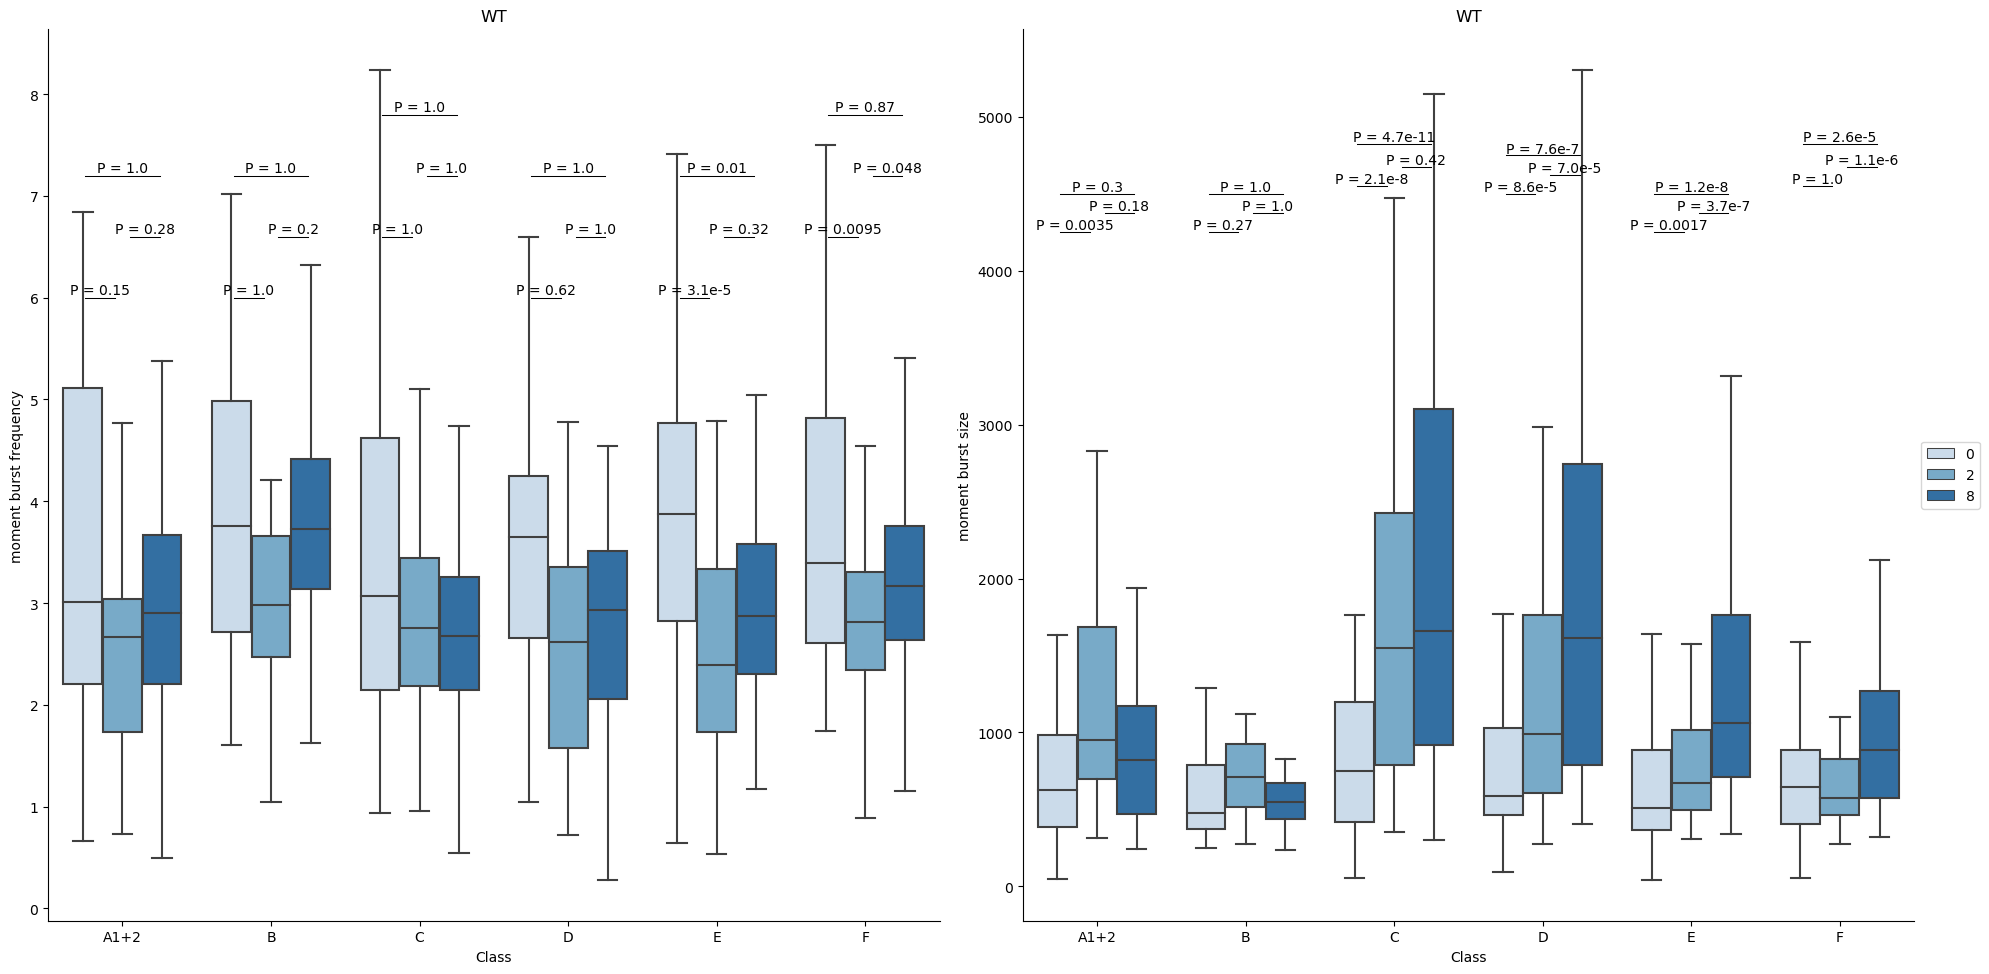

Percent 20.0%
Total genes considered 356


In [3]:
alpha = 0.2
include("scRNAseqmomentsWT.jl")

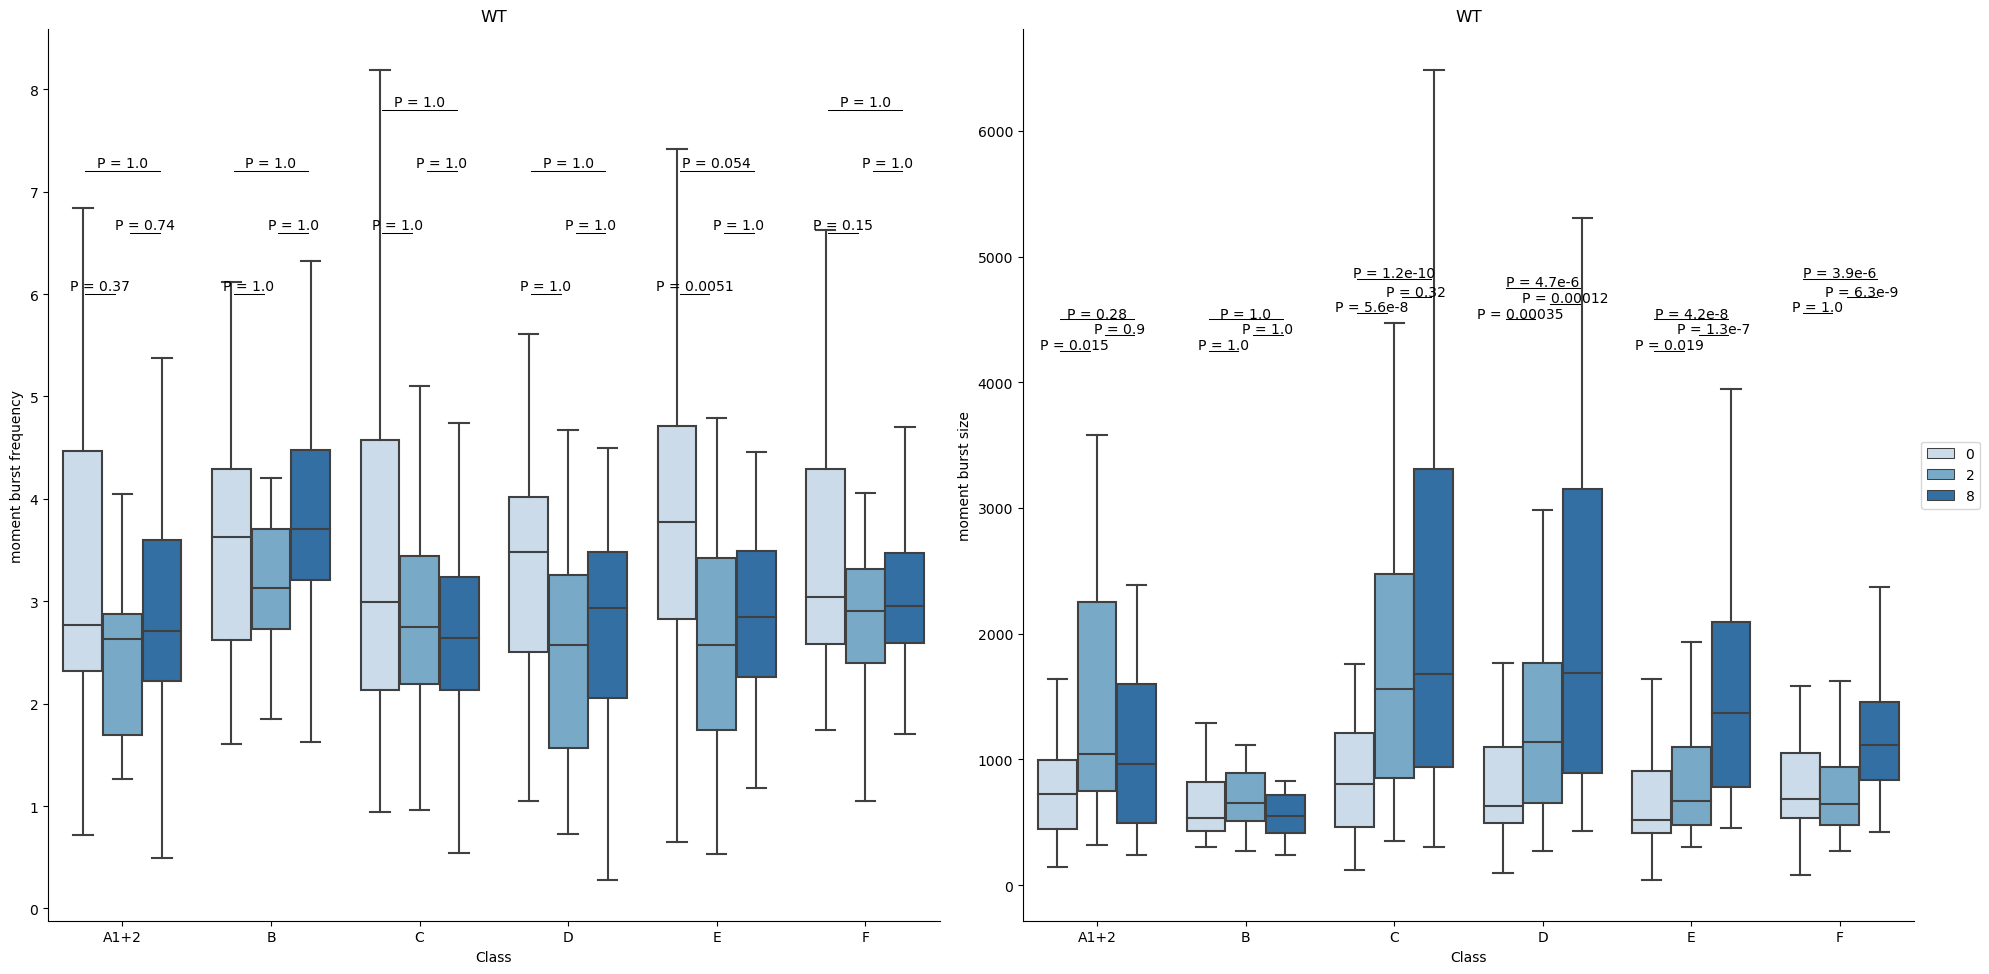

Percent 30.0%
Total genes considered 296


In [4]:
alpha = 0.3
include("scRNAseqmomentsWT.jl")

In [5]:
import Pkg
Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [336ed68f] CSV v0.10.2
  [a93c6f00] DataFrames v1.3.2
  [31c24e10] Distributions v0.25.48
  [c2308a5c] FASTX v1.2.0
  [53c48c17] FixedPointNumbers v0.8.4
  [09f84164] HypothesisTests v0.10.6
  [7073ff75] IJulia v1.23.2
  [6a3955dd] ImageFiltering v0.7.1
  [6218d12a] ImageMagick v1.2.2
  [86fae568] ImageView v0.10.15
  [916415d5] Images v0.25.1
  [96684042] InformationMeasures v0.3.1
  [4138dd39] JLD v0.13.1
  [093fc24a] LightGraphs v1.3.5
  [10e44e05] MATLAB v0.8.2
  [f8716d33] MultipleTesting v0.5.0
  [eadc2687] Pandas v1.5.3
  [91a5bcdd] Plots v1.25.8
  [92933f4c] ProgressMeter v1.7.1
  [438e738f] PyCall v1.93.0
  [d330b81b] PyPlot v2.10.0
  [6f49c342] RCall v0.13.13
  [3646fa90] ScikitLearn v0.6.4
  [d2ef9438] Seaborn v1.0.0
  [2913bbd2] StatsBase v0.33.14
